# Regresja liniowa

Zbiór danych: https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset

Problem biznesowy: Prognoza siły wiatru na podstawie innych parametrów, przez co nie będą potrzebne dodatkowe maszyny pomiarowe. Będzie można też na podstawie prognozy pogody i opadów oszacować prędkość wiatru.

Dokumentacja: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html

In [1]:
from  sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Ustawienie folderu głównego
# Wywołanie tej komórki drugi raz spowoduje dodatkowe cofnięcie folderów. W takim wypadku ustaw ścieżkę bezwzględną
os.chdir('../')

In [3]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [4]:
# Wczytanie danych
df = pd.read_csv("data/wind_dataset.csv")

In [4]:
# Nagłówek
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [5]:
# braki danych
df.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [6]:
# Opis zmiennych 
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [7]:
# Wstępnie zmienne X - wszystkie zmienne
initial_names = ['IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G']

In [8]:
# Zmienne numeryczne
numeric_columns = ['RAIN','T.MAX','T.MIN','T.MIN.G']

In [9]:
# korelacja
df.select_dtypes(exclude='object').corr()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
WIND,1.000000,-0.038578,0.120876,0.070512,-0.242559,0.047860,-0.093014,0.012823
IND,-0.038578,1.000000,-0.148535,-0.028176,-0.075365,-0.015173,-0.050447,-0.064185
RAIN,0.120876,-0.148535,1.000000,0.023944,-0.044248,0.012567,0.011067,0.027365
IND.1,0.070512,-0.028176,0.023944,1.000000,-0.036045,0.909739,-0.033344,-0.004040
T.MAX,-0.242559,-0.075365,-0.044248,-0.036045,1.000000,-0.247060,0.789980,0.679804
IND.2,0.047860,-0.015173,0.012567,0.909739,-0.247060,1.000000,-0.535746,-0.129421
T.MIN,-0.093014,-0.050447,0.011067,-0.033344,0.789980,-0.535746,1.000000,0.906869
T.MIN.G,0.012823,-0.064185,0.027365,-0.004040,0.679804,-0.129421,0.906869,1.000000


Zmienne T.MIN oraz T.MIN.G mają korelacje na poziomie 0.9, użyjemy tylko jednej. Ostateczna decyzja zostanie podjęta później. 

<b>Braki danych </b>

Nie znamy przyczyny braków danych. W przypadu 10% wartości pustych, może być to zbyt dużo, aby poprostu uzupełnić je średnią lub 0. 
Z uwagi na dostatecznie dużą próbkę danych, najlepszą opcją jest usunięcie kłopotliwych rekordów. 

In [11]:
# Usunięcie braków danych
df.dropna(inplace=True)
df.shape

(5638, 9)

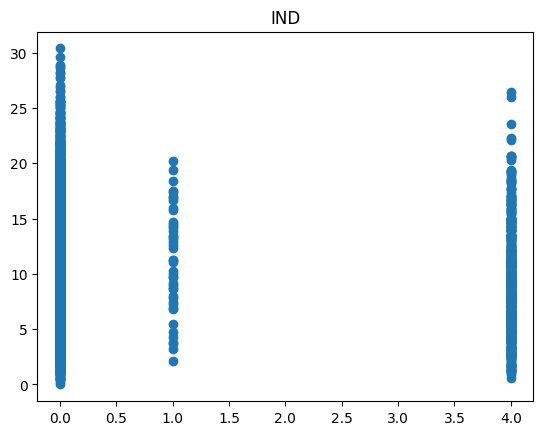

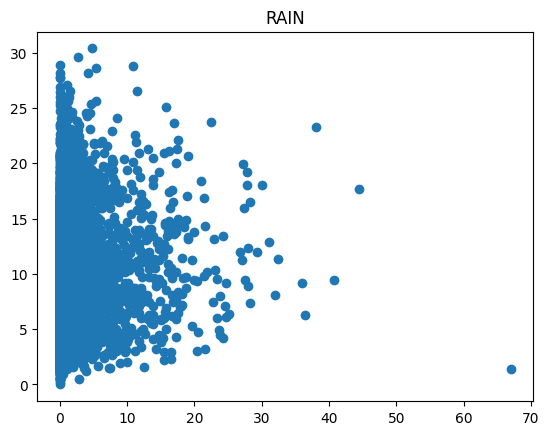

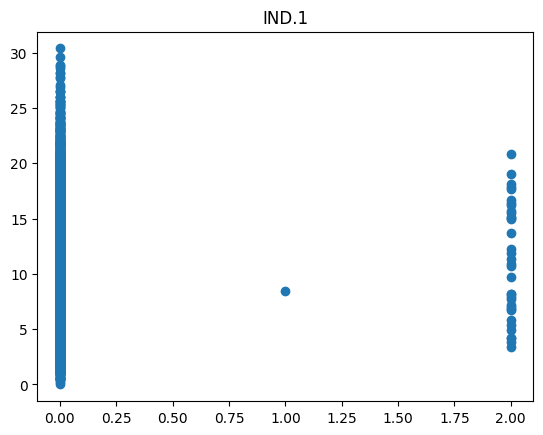

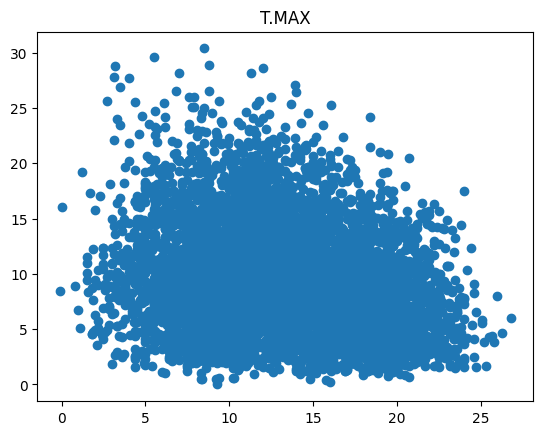

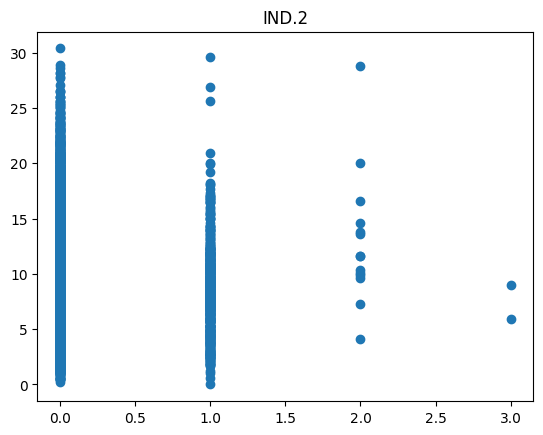

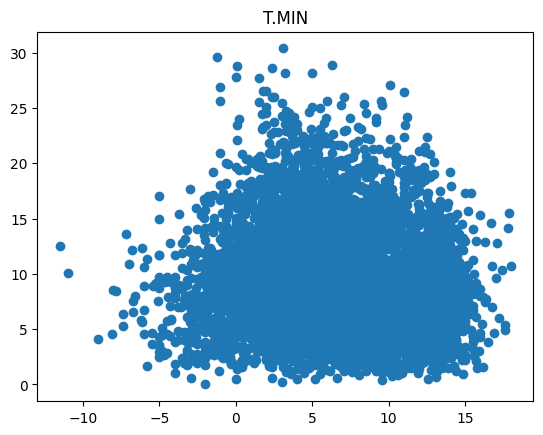

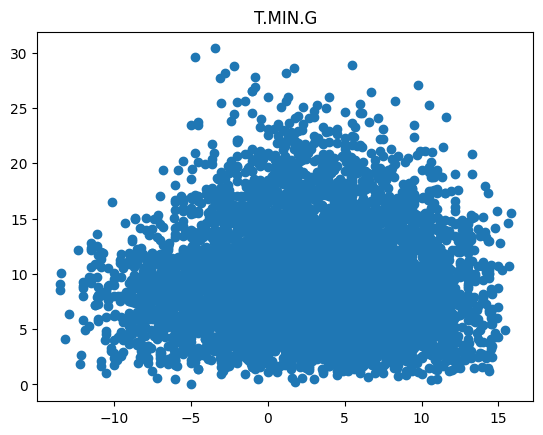

In [12]:
# Wykresy zależności zmiennych
for i in initial_names:
    plt.scatter(df[i],df['WIND'])
    plt.title(f'{i}')
    plt.show()

In [13]:
# sprawdźmy kilka innych przekształceń 
for i in initial_names:
    df[f'{i}_log'] = np.log(df[i]+100)
    df[f'{i}_exp'] = np.exp(df[i])
    df[f'{i}_2'] = df[i]**2
    df[f'{i}_3'] = df[i]**3
    df[f'{i}_inverse'] = 1/(df[i]+100)

Policzymy też interakcje zmiennych. Najczęściej są wykorzystywane w regresji liniowej i logistycznej, które wymagają większej inżynierii cech niż inne modele.

In [15]:
from itertools import product

In [16]:
# interakcje
interaction_list = product(initial_names,initial_names)

In [18]:
# Obliczenie interakcji
for i in interaction_list:
    df[f'{i[0]}_{i[1]}'] = df[i[0]] * df[i[1]]

In [21]:
pd.set_option('display.max_rows',None)

In [22]:
# Korelacje
df.select_dtypes(exclude='object').corr().sort_values(by='WIND')['WIND']


T.MAX_3           -0.266561
T.MAX_2           -0.263294
T.MAX_T.MAX       -0.263294
T.MAX             -0.245441
T.MAX_log         -0.242572
T.MAX_T.MIN       -0.170263
T.MIN_T.MAX       -0.170263
T.MIN_2           -0.137092
T.MIN_T.MIN       -0.137092
T.MIN_3           -0.131968
RAIN_inverse      -0.126601
T.MIN.G_T.MIN.G   -0.111565
T.MIN.G_2         -0.111565
T.MIN_T.MIN.G     -0.095583
T.MIN.G_T.MIN     -0.095583
T.MIN             -0.084787
T.MIN_log         -0.080892
T.MAX_T.MIN.G     -0.063567
T.MIN.G_T.MAX     -0.063567
T.MAX_exp         -0.062010
IND.2_log         -0.059868
IND.2             -0.059779
T.MAX_IND         -0.055405
IND_T.MAX         -0.055405
IND_IND.2         -0.053482
IND.2_IND         -0.053482
T.MAX_IND.2       -0.052912
IND.2_T.MAX       -0.052912
IND.2_exp         -0.042062
IND.2_2           -0.041300
IND.2_IND.2       -0.041300
IND_3             -0.035790
IND_exp           -0.035657
IND_IND           -0.035407
IND_2             -0.035407
IND               -0

In [23]:
# kolumny kategoryczne
cols= ['IND','IND.1']

In [24]:
# Średnie po wartościach kategorii
for i in cols:
    print(df[[i,'WIND']].groupby(i).describe())

       WIND                                                        
      count       mean       std   min   25%    50%      75%    max
IND                                                                
0    5041.0   9.727538  4.969753  0.00  5.91   9.08  12.9200  30.37
1      45.0  11.217333  4.730114  2.13  7.83  11.25  14.5400  20.21
4     552.0   9.144004  4.610275  0.63  5.83   8.85  11.6025  26.42
         WIND                                                        
        count       mean       std   min    25%    50%     75%    max
IND.1                                                                
0.0    5602.0   9.673179  4.936301  0.00  5.910   9.08  12.830  30.37
1.0       1.0   8.460000       NaN  8.46  8.460   8.46   8.460   8.46
2.0      35.0  11.176571  5.122536  3.42  6.915  10.92  15.605  20.79


Zmienne kategoryczne nie wykazują dużego zróżnicowania, dlatego nie będą użyte

In [25]:
x_final_cols = ['RAIN_inverse', 'T.MAX_3','T.MAX_2','T.MAX', 'T.MAX_T.MIN','T.MIN_2','T.MIN_3','T.MIN']

### Outliers

In [29]:
os.chdir('4_regresja')

In [30]:
from funkcje_pomocnicze import find_outliers

In [33]:
outliers_cols = ['RAIN','T.MIN',"T.MAX","WIND"]

In [34]:
# Znalezienie outlierów dla podstawowych wersji zmiennych
outliers_names = []
for i in outliers_cols:
    df.loc[:,f'{i}_outlier'] = find_outliers(df.loc[df[i]>0,i])
    outliers_names.append(f'{i}_outlier')

In [35]:
df.loc[:,'outlier_total'] = df.loc[:,outliers_names].max(axis=1)

In [36]:
# liczba outlierów
df['outlier_total'].value_counts()

outlier_total
False    5309
True      329
Name: count, dtype: int64

In [37]:
# usunięcie outlierów
df = df[df['outlier_total']==False].reset_index(drop=True)

In [38]:
# Podział zbioru
train_x, test_x, train_y, test_y = train_test_split(df[x_final_cols],df['WIND'], test_size=0.3, random_state=123)

In [39]:
os.chdir('../')

In [40]:
# Zapisanie zbiorów na potrzeby przyszłych zajęć
train_x.to_csv('data/wind_train_x.csv')
test_x.to_csv('data/wind_test_x.csv')
train_y.to_csv('data/wind_train_y.csv')
test_y.to_csv('data/wind_test_y.csv')

In [41]:
# Estymacja modelu
model = LinearRegression().fit(train_x, train_y)